In [17]:
# Cell 1: Setup
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# Project directories
project_dir = "yolo_training"
experiments = {
    "Transfer Learning": "yolov8n_custom3",  # Update these to match your actual folder names
    "Transfer Learning w/ Aug": "yolov8n_pretrained_augmented4",
    "From Scratch": "yolov8n_custom5",  # Update with your actual folder names
    "From Scratch w/ Aug": "yolov8n_scratch_augmented"  # Update with your actual folder names
}

In [2]:
# Cell 2: Function to load metrics from saved model weights
def get_metrics_from_saved_model(experiment_name, folder_name):
    model_path = os.path.join(project_dir, folder_name, "weights", "best.pt")
    
    if os.path.exists(model_path):
        print(f"Loading model from {model_path}")
        model = YOLO(model_path)
        
        # Validate the model
        results = model.val(data="datasets/voc_yolo_converted/voc_yolo.yaml")
        
        return {
            "Experiment": experiment_name,
            "mAP50-95": results.box.map,
            "mAP50": results.box.map50,
            "Precision": results.box.mp,
            "Recall": results.box.mr
        }
    else:
        print(f"Warning: Model not found at {model_path}")
        return None

In [4]:
# Cell 3: Collect results from each experiment
results_list = []

for exp_name, folder_name in experiments.items():
    metrics = get_metrics_from_saved_model(exp_name, folder_name)
    if metrics:
        results_list.append(metrics)

# Create comparison DataFrame
if results_list:
    results_df = pd.DataFrame(results_list)
    print("\n=== EXPERIMENTAL RESULTS COMPARISON ===\n")
    print(results_df.to_string(index=False))
else:
    print("No results found. Please check your experiment directory names.")

Loading model from yolo_training/yolov8n_custom3/weights/best.pt
Ultralytics 8.3.130 🚀 Python-3.10.17 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 2.6±0.4 ms, read: 17.4±6.6 MB/s, size: 83.5 KB)


val: Scanning /mnt/c/Users/kdb/Documents/msds/springMod2/deepLearning/2d_obj/datasets/voc_yolo_converted/val/labels.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:45<00:00,  6.83it/s]


                   all       4952      14976      0.793      0.663      0.745      0.524
             aeroplane        205        311      0.815       0.72      0.811      0.561
               bicycle        250        389      0.826      0.721      0.808      0.588
                  bird        289        576      0.763      0.627      0.705      0.447
                  boat        176        393       0.68      0.547      0.614      0.357
                bottle        240        657      0.794       0.46      0.557      0.361
                   bus        183        254      0.787      0.713      0.795       0.66
                   car        775       1541      0.877      0.767      0.859      0.636
                   cat        332        370      0.823      0.732      0.807      0.601
                 chair        545       1374      0.755      0.456      0.574      0.367
                   cow        127        329      0.789      0.748      0.806      0.569
           diningtabl

val: Scanning /mnt/c/Users/kdb/Documents/msds/springMod2/deepLearning/2d_obj/datasets/voc_yolo_converted/val/labels.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:43<00:00,  7.10it/s]


                   all       4952      14976      0.763      0.645      0.717      0.459
             aeroplane        205        311      0.838      0.717      0.804      0.479
               bicycle        250        389      0.831      0.735      0.805      0.541
                  bird        289        576      0.801       0.62      0.703      0.396
                  boat        176        393      0.679      0.473      0.534      0.287
                bottle        240        657      0.739      0.409      0.529      0.294
                   bus        183        254      0.806      0.687      0.773      0.584
                   car        775       1541       0.86      0.741      0.836      0.575
                   cat        332        370      0.758      0.765      0.807       0.54
                 chair        545       1374      0.731      0.399      0.525        0.3
                   cow        127        329      0.763      0.714      0.778      0.491
           diningtabl

val: Scanning /mnt/c/Users/kdb/Documents/msds/springMod2/deepLearning/2d_obj/datasets/voc_yolo_converted/val/labels.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:41<00:00,  7.41it/s]


                   all       4952      14976      0.478      0.389      0.394      0.234
             aeroplane        205        311      0.539      0.486      0.472      0.279
               bicycle        250        389      0.529      0.506      0.524       0.32
                  bird        289        576      0.381      0.221      0.211      0.107
                  boat        176        393      0.485      0.186      0.219      0.112
                bottle        240        657      0.333       0.07     0.0841      0.038
                   bus        183        254      0.566      0.508      0.512      0.378
                   car        775       1541      0.663      0.537      0.601      0.415
                   cat        332        370      0.433      0.435      0.411      0.244
                 chair        545       1374      0.445      0.207      0.234      0.114
                   cow        127        329      0.391      0.426      0.347      0.207
           diningtabl

val: Scanning /mnt/c/Users/kdb/Documents/msds/springMod2/deepLearning/2d_obj/datasets/voc_yolo_converted/val/labels.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:41<00:00,  7.55it/s]


                   all       4952      14976      0.378      0.292      0.268      0.129
             aeroplane        205        311      0.446      0.363      0.374      0.151
               bicycle        250        389      0.352      0.401      0.373      0.191
                  bird        289        576       0.31     0.0885      0.106     0.0454
                  boat        176        393      0.323     0.0433     0.0764      0.032
                bottle        240        657      0.329    0.00304     0.0259    0.00967
                   bus        183        254      0.341      0.398      0.317      0.163
                   car        775       1541      0.512      0.464      0.486      0.262
                   cat        332        370      0.355      0.424      0.329      0.162
                 chair        545       1374      0.369      0.102       0.12     0.0493
                   cow        127        329      0.283      0.322      0.198     0.0977
           diningtabl

Loading training progress for Transfer Learning from yolo_training/yolov8n_custom3/results.csv
Loading training progress for Transfer Learning w/ Aug from yolo_training/yolov8n_pretrained_augmented4/results.csv
Loading training progress for From Scratch from yolo_training/yolov8n_custom5/results.csv
Loading training progress for From Scratch w/ Aug from yolo_training/yolov8n_scratch_augmented/results.csv


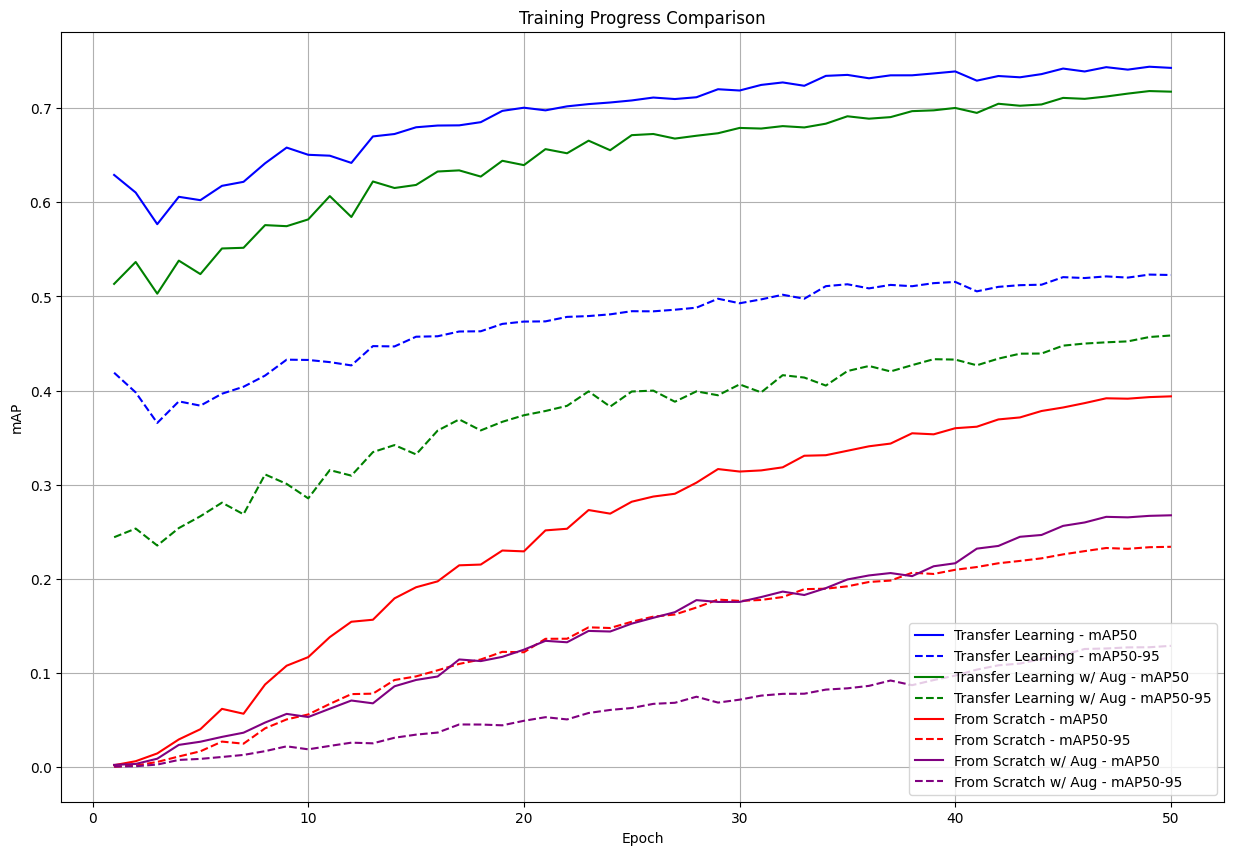

In [5]:
# Cell 4: Load and plot training progress for each experiment
plt.figure(figsize=(15, 10))

colors = {
    "Transfer Learning": "blue",
    "Transfer Learning w/ Aug": "green",
    "From Scratch": "red",
    "From Scratch w/ Aug": "purple"
}

for exp_name, folder_name in experiments.items():
    results_file = Path(project_dir) / folder_name / "results.csv"
    if results_file.exists():
        print(f"Loading training progress for {exp_name} from {results_file}")
        df = pd.read_csv(results_file)
        plt.plot(df['epoch'], df['metrics/mAP50(B)'], label=f"{exp_name} - mAP50", linestyle='-', color=colors[exp_name])
        plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label=f"{exp_name} - mAP50-95", linestyle='--', color=colors[exp_name])
    else:
        print(f"Warning: Results CSV not found for {exp_name} at {results_file}")

plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("Training Progress Comparison")
plt.legend()
plt.grid(True)
plt.savefig("experiment_comparison.png")
plt.show()

Ultralytics 8.3.130 🚀 Python-3.10.17 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 2.4±0.3 ms, read: 18.6±4.4 MB/s, size: 88.8 KB)


val: Scanning /mnt/c/Users/kdb/Documents/msds/springMod2/deepLearning/2d_obj/datasets/voc_yolo_converted/val/labels.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:43<00:00,  7.07it/s]


                   all       4952      14976      0.793      0.663      0.745      0.524
             aeroplane        205        311      0.815       0.72      0.811      0.561
               bicycle        250        389      0.826      0.721      0.808      0.588
                  bird        289        576      0.763      0.627      0.705      0.447
                  boat        176        393       0.68      0.547      0.614      0.357
                bottle        240        657      0.794       0.46      0.557      0.361
                   bus        183        254      0.787      0.713      0.795       0.66
                   car        775       1541      0.877      0.767      0.859      0.636
                   cat        332        370      0.823      0.732      0.807      0.601
                 chair        545       1374      0.755      0.456      0.574      0.367
                   cow        127        329      0.789      0.748      0.806      0.569
           diningtabl

val: Scanning /mnt/c/Users/kdb/Documents/msds/springMod2/deepLearning/2d_obj/datasets/voc_yolo_converted/val/labels.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:44<00:00,  7.00it/s]


                   all       4952      14976      0.763      0.645      0.717      0.459
             aeroplane        205        311      0.838      0.717      0.804      0.479
               bicycle        250        389      0.831      0.735      0.805      0.541
                  bird        289        576      0.801       0.62      0.703      0.396
                  boat        176        393      0.679      0.473      0.534      0.287
                bottle        240        657      0.739      0.409      0.529      0.294
                   bus        183        254      0.806      0.687      0.773      0.584
                   car        775       1541       0.86      0.741      0.836      0.575
                   cat        332        370      0.758      0.765      0.807       0.54
                 chair        545       1374      0.731      0.399      0.525        0.3
                   cow        127        329      0.763      0.714      0.778      0.491
           diningtabl

val: Scanning /mnt/c/Users/kdb/Documents/msds/springMod2/deepLearning/2d_obj/datasets/voc_yolo_converted/val/labels.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:41<00:00,  7.39it/s]


                   all       4952      14976      0.478      0.389      0.394      0.234
             aeroplane        205        311      0.539      0.486      0.472      0.279
               bicycle        250        389      0.529      0.506      0.524       0.32
                  bird        289        576      0.381      0.221      0.211      0.107
                  boat        176        393      0.485      0.186      0.219      0.112
                bottle        240        657      0.333       0.07     0.0841      0.038
                   bus        183        254      0.566      0.508      0.512      0.378
                   car        775       1541      0.663      0.537      0.601      0.415
                   cat        332        370      0.433      0.435      0.411      0.244
                 chair        545       1374      0.445      0.207      0.234      0.114
                   cow        127        329      0.391      0.426      0.347      0.207
           diningtabl

val: Scanning /mnt/c/Users/kdb/Documents/msds/springMod2/deepLearning/2d_obj/datasets/voc_yolo_converted/val/labels.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:41<00:00,  7.48it/s]


                   all       4952      14976      0.378      0.292      0.268      0.129
             aeroplane        205        311      0.446      0.363      0.374      0.151
               bicycle        250        389      0.352      0.401      0.373      0.191
                  bird        289        576       0.31     0.0885      0.106     0.0454
                  boat        176        393      0.323     0.0433     0.0764      0.032
                bottle        240        657      0.329    0.00304     0.0259    0.00967
                   bus        183        254      0.341      0.398      0.317      0.163
                   car        775       1541      0.512      0.464      0.486      0.262
                   cat        332        370      0.355      0.424      0.329      0.162
                 chair        545       1374      0.369      0.102       0.12     0.0493
                   cow        127        329      0.283      0.322      0.198     0.0977
           diningtabl

<Figure size 1400x1000 with 0 Axes>

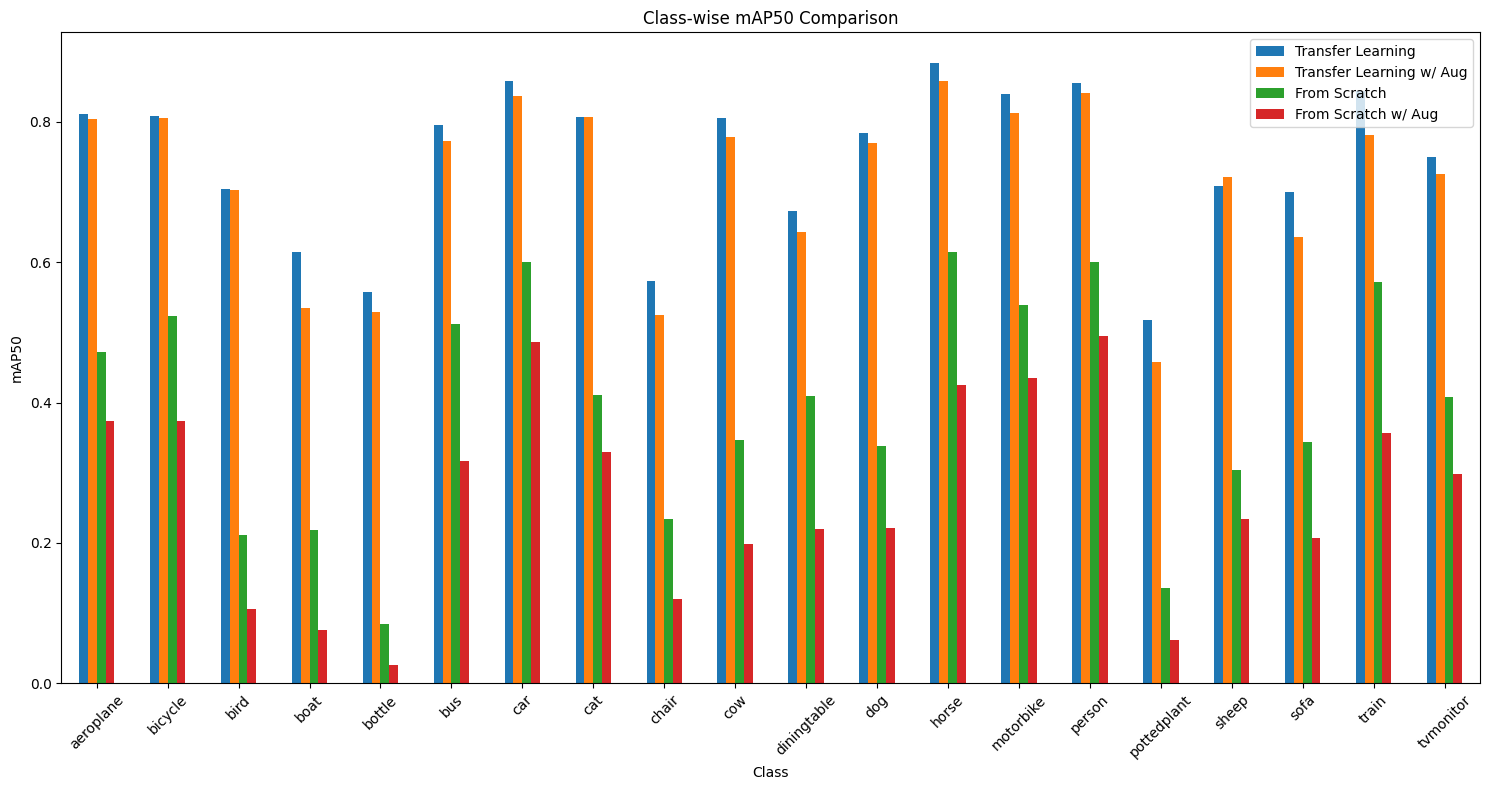

In [6]:
# Cell 5: Compare class-wise performance for different experiments
def get_classwise_metrics(experiment_name, folder_name):
    model_path = os.path.join(project_dir, folder_name, "weights", "best.pt")
    
    if os.path.exists(model_path):
        model = YOLO(model_path)
        results = model.val(data="datasets/voc_yolo_converted/voc_yolo.yaml")
        
        class_metrics = {}
        for i, ap in enumerate(results.box.ap50):
            class_metrics[model.names[i]] = ap
            
        return pd.Series(class_metrics, name=experiment_name)
    else:
        print(f"Warning: Model not found at {model_path}")
        return None

# Get class-wise results for each available experiment
class_results = []
for exp_name, folder_name in experiments.items():
    class_metrics = get_classwise_metrics(exp_name, folder_name)
    if class_metrics is not None:
        class_results.append(class_metrics)

if class_results:
    # Combine into a DataFrame
    class_df = pd.concat(class_results, axis=1)
    
    # Display class-wise comparison
    print("\n=== CLASS-WISE PERFORMANCE COMPARISON (mAP50) ===\n")
    print(class_df.to_string())
    
    # Visualize class-wise performance
    plt.figure(figsize=(14, 10))
    class_df.plot(kind='bar', figsize=(15, 8))
    plt.title('Class-wise mAP50 Comparison')
    plt.xlabel('Class')
    plt.ylabel('mAP50')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("class_performance_comparison.png")
    plt.show()
else:
    print("No class-wise results available.")

In [9]:
# Cell: Summary Table of Results (Fixed)
summary_data = []

for exp_name, folder_name in experiments.items():
    results_file = Path(project_dir) / folder_name / "results.csv"
    if results_file.exists():
        df = pd.read_csv(results_file)
        last_row = df.iloc[-1]  # Get final epoch values
        
        # Check if training time column exists (name might vary)
        training_time = None
        for possible_column in ['time(hrs)', 'time(h)', 'time']:
            if possible_column in df.columns:
                training_time = round(last_row[possible_column], 2)
                break
        
        # Calculate F1-Score if precision and recall columns exist
        f1_score = None
        if 'metrics/precision(B)' in df.columns and 'metrics/recall(B)' in df.columns:
            p = last_row['metrics/precision(B)']
            r = last_row['metrics/recall(B)']
            if p > 0 and r > 0:  # Avoid division by zero
                f1_score = round(2 * (p * r) / (p + r), 4)
        
        summary_data.append({
            'Experiment': exp_name,
            'mAP50': round(df['metrics/mAP50(B)'].max(), 4) if 'metrics/mAP50(B)' in df.columns else None,
            'mAP50-95': round(df['metrics/mAP50-95(B)'].max(), 4) if 'metrics/mAP50-95(B)' in df.columns else None,
            'Precision': round(last_row['metrics/precision(B)'], 4) if 'metrics/precision(B)' in df.columns else None,
            'Recall': round(last_row['metrics/recall(B)'], 4) if 'metrics/recall(B)' in df.columns else None,
            'Final Epoch': int(last_row['epoch']),
            'Training Time (hrs)': training_time,
            'F1-Score': f1_score
        })

summary_df = pd.DataFrame(summary_data)
# Remove any columns that are all None
summary_df = summary_df.loc[:, summary_df.notna().any()]
summary_df = summary_df.sort_values('mAP50', ascending=False)
display(summary_df)

Experiment   mAP50  mAP50-95  Precision  Recall  Final Epoch  \
0         Transfer Learning  0.7440    0.5233     0.7825  0.6695           50   
1  Transfer Learning w/ Aug  0.7182    0.4586     0.7627  0.6459           50   
2              From Scratch  0.3940    0.2342     0.4787  0.3914           50   
3       From Scratch w/ Aug  0.2676    0.1290     0.3788  0.2923           50   

   Training Time (hrs)  F1-Score  
0              3715.85    0.7216  
1              4265.75    0.6994  
2              3957.94    0.4306  
3              4324.49    0.3300

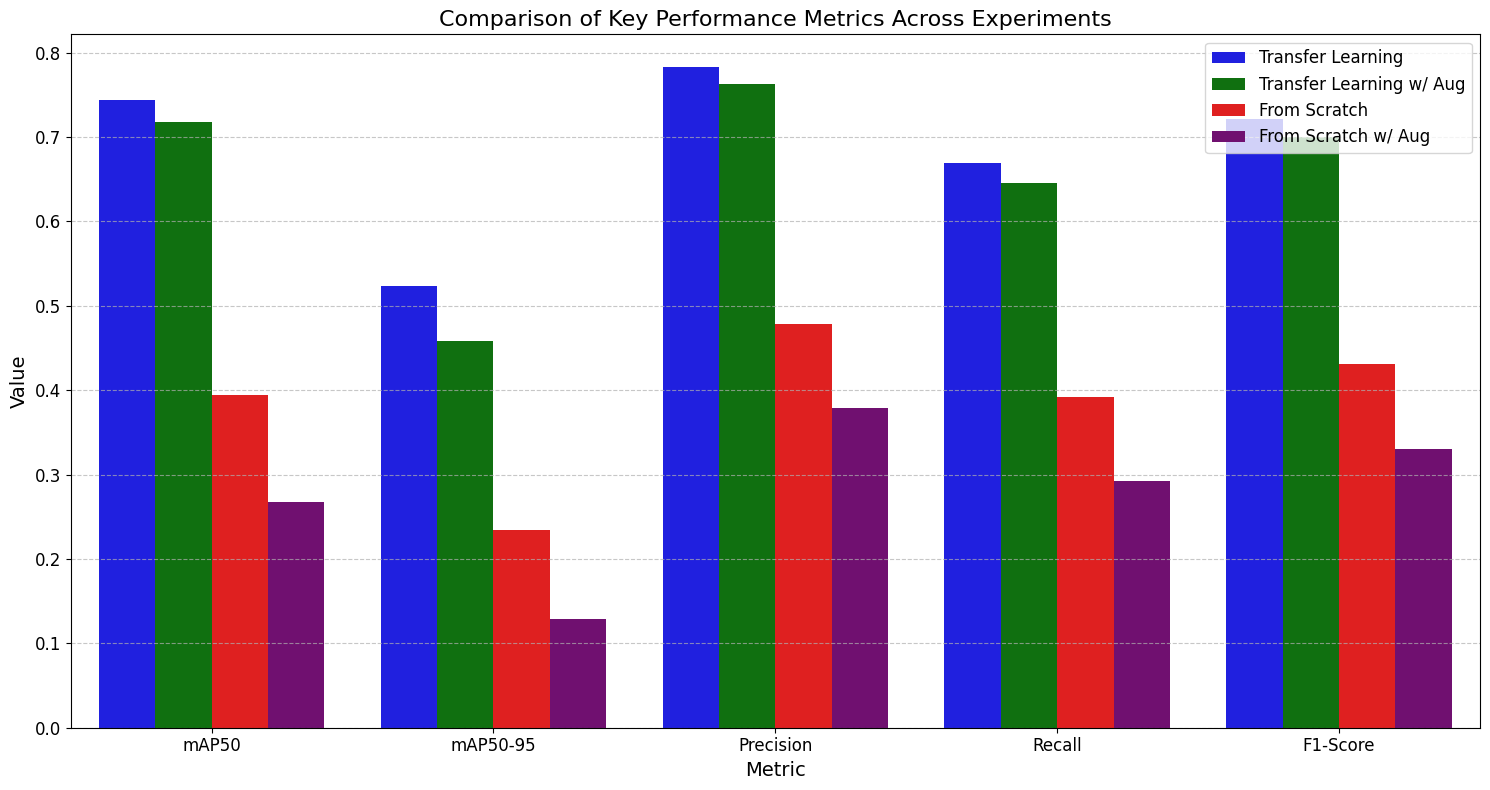

In [14]:
import seaborn as sns
# Cell: Metrics Comparison Bar Chart (Fixed)
# Only include metrics that are present in the summary DataFrame
metrics_to_plot = [col for col in ['mAP50', 'mAP50-95', 'Precision', 'Recall', 'F1-Score'] 
                  if col in summary_df.columns]

if metrics_to_plot:  # Only create the plot if we have metrics
    summary_df_melted = pd.melt(summary_df, id_vars=['Experiment'], 
                              value_vars=metrics_to_plot, 
                              var_name='Metric', value_name='Value')
    
    # Drop any rows with NaN values
    summary_df_melted = summary_df_melted.dropna()

    plt.figure(figsize=(15, 8))
    sns.barplot(data=summary_df_melted, x='Metric', y='Value', hue='Experiment', 
              palette=colors)
    plt.title('Comparison of Key Performance Metrics Across Experiments', fontsize=16)
    plt.ylabel('Value', fontsize=14)
    plt.xlabel('Metric', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('experiment_metrics_comparison.png', dpi=300)
    plt.show()
else:
    print("No metrics available for plotting")

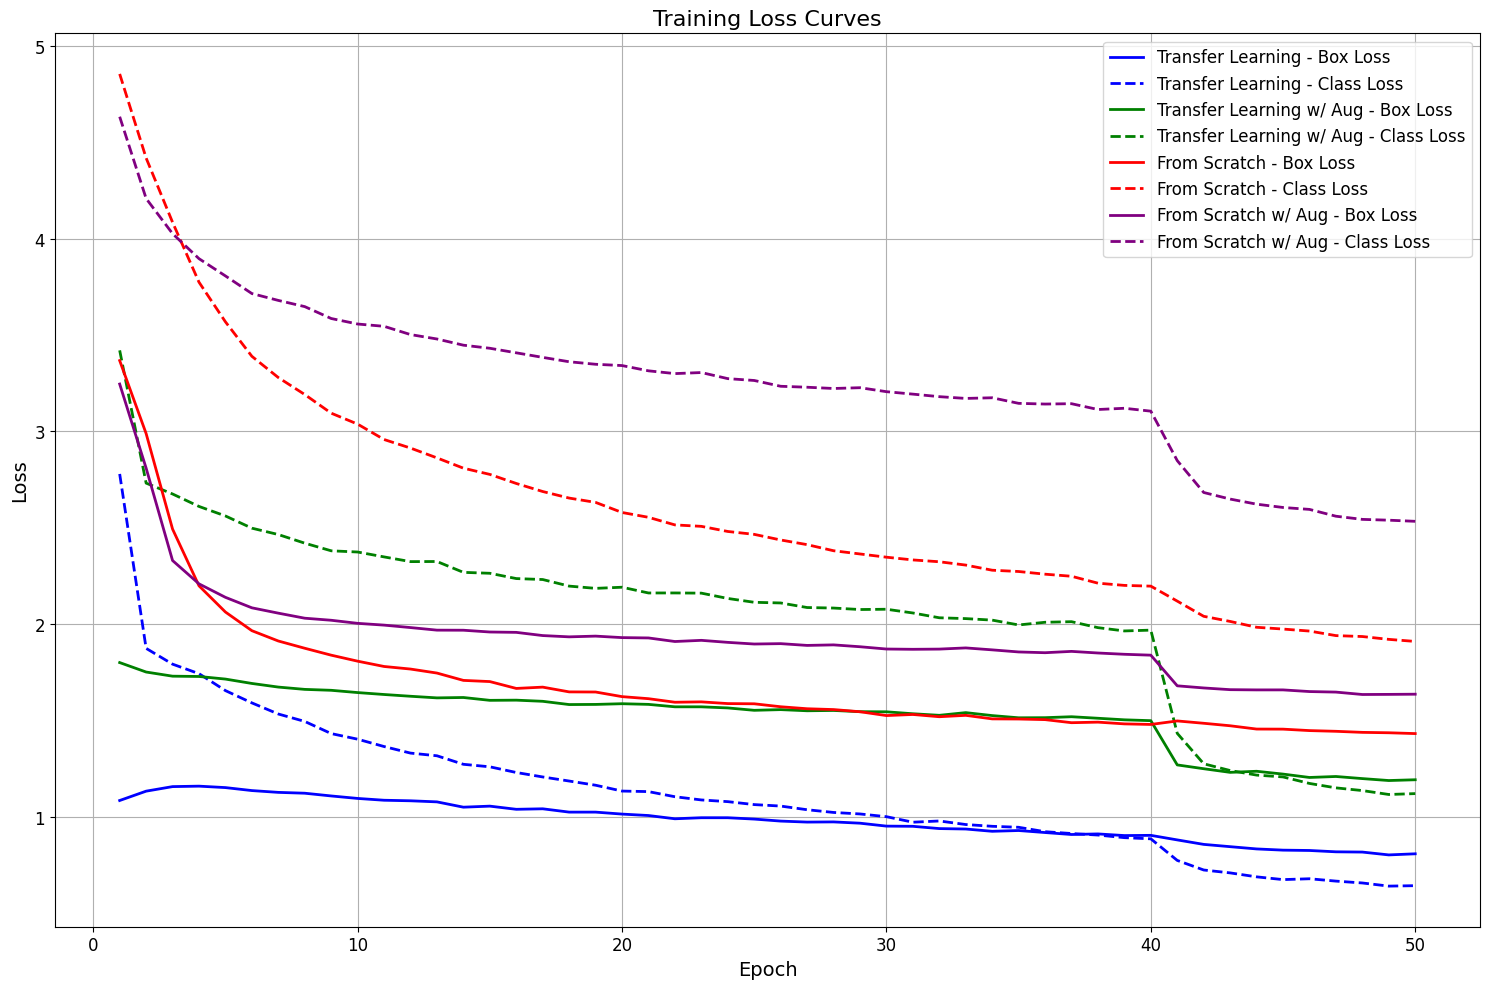

In [18]:
# Cell: Training Loss Curves
plt.figure(figsize=(15, 10))

for exp_name, folder_name in experiments.items():
    results_file = Path(project_dir) / folder_name / "results.csv"
    if results_file.exists():
        df = pd.read_csv(results_file)
        plt.plot(df['epoch'], df['train/box_loss'], 
                label=f"{exp_name} - Box Loss", 
                linestyle='-', 
                color=colors[exp_name], 
                linewidth=2)
        plt.plot(df['epoch'], df['train/cls_loss'], 
                label=f"{exp_name} - Class Loss", 
                linestyle='--', 
                color=colors[exp_name], 
                linewidth=2)

plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Training Loss Curves", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("training_loss_curves.png", dpi=300)
plt.show()

In [19]:
# Cell: Per-Class Performance Analysis
class_metrics = []

for exp_name, folder_name in experiments.items():
    # Try to find the latest class metrics file (typically in val folder)
    metrics_file = Path(project_dir) / folder_name / "val" / "metrics.csv"
    if not metrics_file.exists():
        metrics_file = Path(project_dir) / folder_name / "metrics.csv"
    
    if metrics_file.exists():
        df = pd.read_csv(metrics_file)
        for _, row in df.iterrows():
            class_metrics.append({
                'Experiment': exp_name,
                'Class': row['class'],
                'mAP50': row['metrics/mAP50(B)'],
                'Precision': row['metrics/precision(B)'],
                'Recall': row['metrics/recall(B)']
            })

class_df = pd.DataFrame(class_metrics)

if not class_df.empty:
    # Plot per-class mAP50 across experiments
    plt.figure(figsize=(16, 10))
    sns.barplot(data=class_df, x='Class', y='mAP50', hue='Experiment', palette=colors)
    plt.title('Per-Class mAP50 Performance Across Experiments', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('mAP50', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('per_class_map50.png', dpi=300)
    plt.show()
    
    # Find the top 5 and bottom 5 performing classes (average across experiments)
    avg_class_perf = class_df.groupby('Class')['mAP50'].mean().reset_index()
    top5_classes = avg_class_perf.nlargest(5, 'mAP50')['Class'].tolist()
    bottom5_classes = avg_class_perf.nsmallest(5, 'mAP50')['Class'].tolist()
    
    # Plot detailed performance for top 5 classes
    plt.figure(figsize=(15, 8))
    top5_df = class_df[class_df['Class'].isin(top5_classes)]
    sns.barplot(data=top5_df, x='Class', y='mAP50', hue='Experiment', palette=colors)
    plt.title('Top 5 Best Performing Classes', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('mAP50', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('top5_class_performance.png', dpi=300)
    plt.show()
    
    # Plot detailed performance for bottom 5 classes
    plt.figure(figsize=(15, 8))
    bottom5_df = class_df[class_df['Class'].isin(bottom5_classes)]
    sns.barplot(data=bottom5_df, x='Class', y='mAP50', hue='Experiment', palette=colors)
    plt.title('Top 5 Challenging Classes', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('mAP50', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('bottom5_class_performance.png', dpi=300)
    plt.show()
else:
    print("No per-class metrics found")

No per-class metrics found


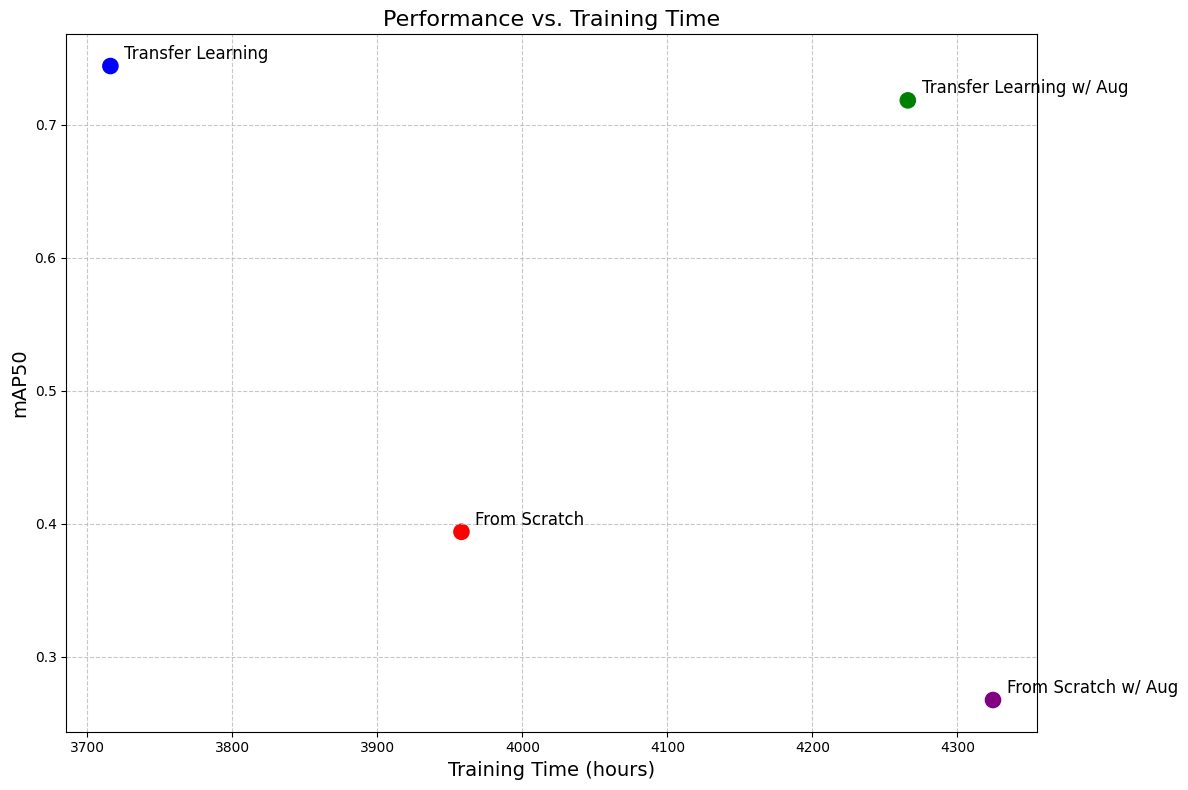

In [16]:
# Cell: Training Time vs. Performance Analysis (Fixed)
if 'Training Time (hrs)' in summary_df.columns and 'mAP50' in summary_df.columns:
    # Drop rows with missing values
    plot_df = summary_df.dropna(subset=['Training Time (hrs)', 'mAP50'])
    
    if not plot_df.empty:
        plt.figure(figsize=(12, 8))
        plt.scatter(plot_df['Training Time (hrs)'], plot_df['mAP50'], 
                  s=120, c=[colors[exp] for exp in plot_df['Experiment']])

        for i, row in plot_df.iterrows():
            plt.annotate(row['Experiment'], 
                       (row['Training Time (hrs)'], row['mAP50']),
                       fontsize=12,
                       xytext=(10, 5),
                       textcoords='offset points')

        plt.xlabel('Training Time (hours)', fontsize=14)
        plt.ylabel('mAP50', fontsize=14)
        plt.title('Performance vs. Training Time', fontsize=16)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('performance_vs_time.png', dpi=300)
        plt.show()
    else:
        print("No valid data for Training Time vs. Performance plot")
else:
    print("Training Time or mAP50 columns not available for plotting")

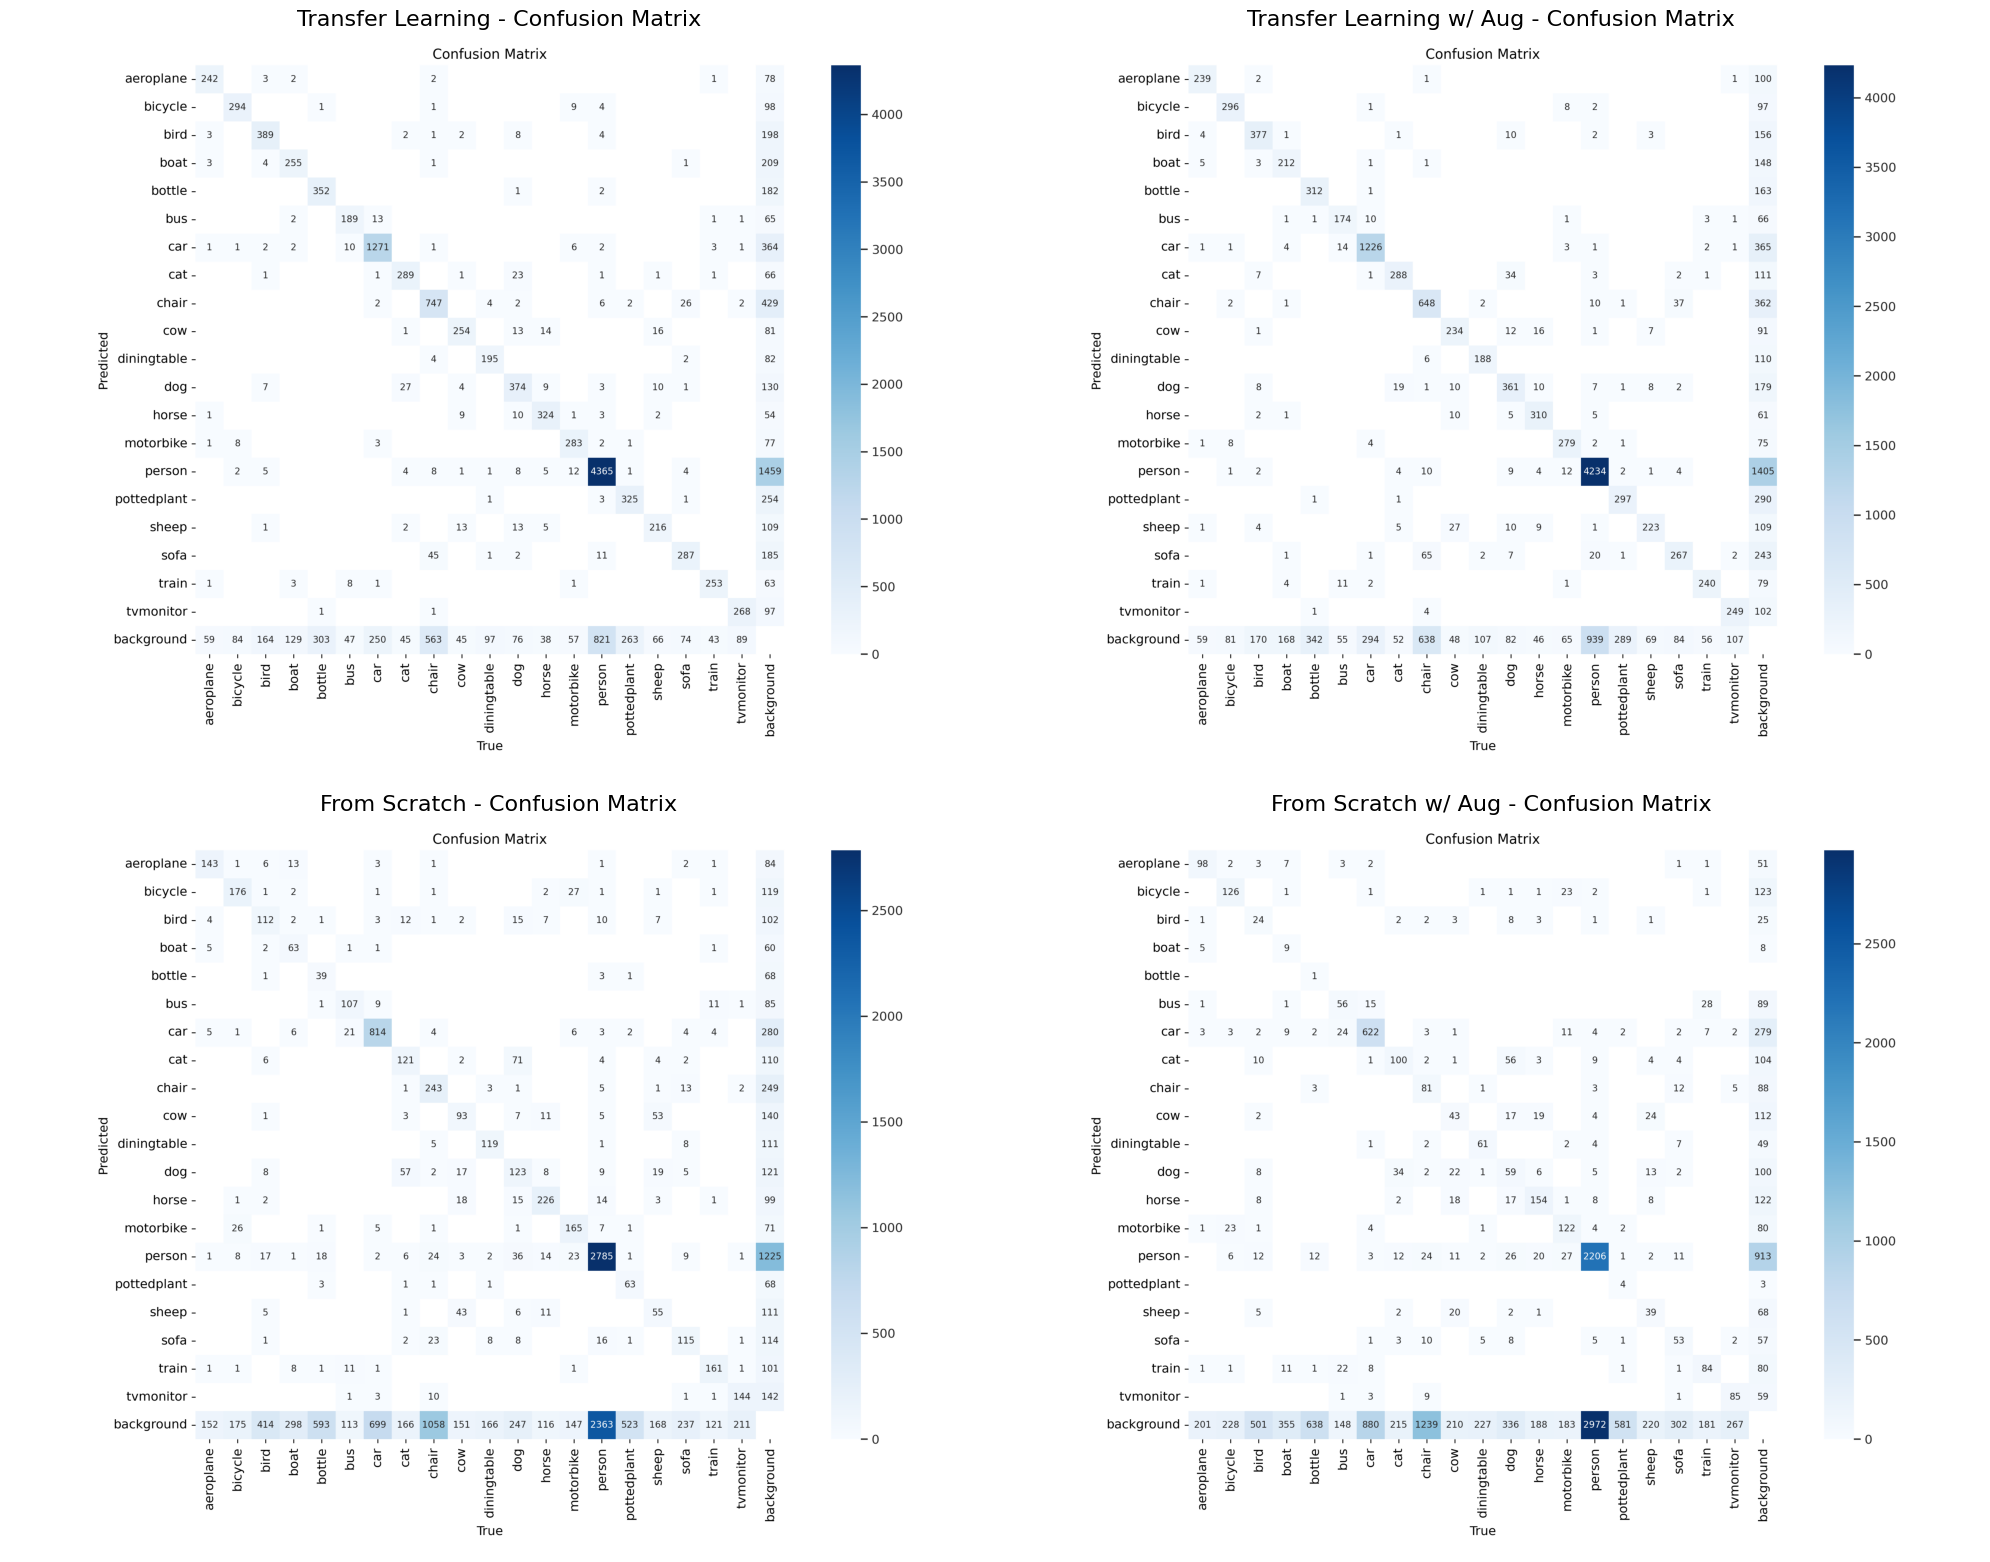

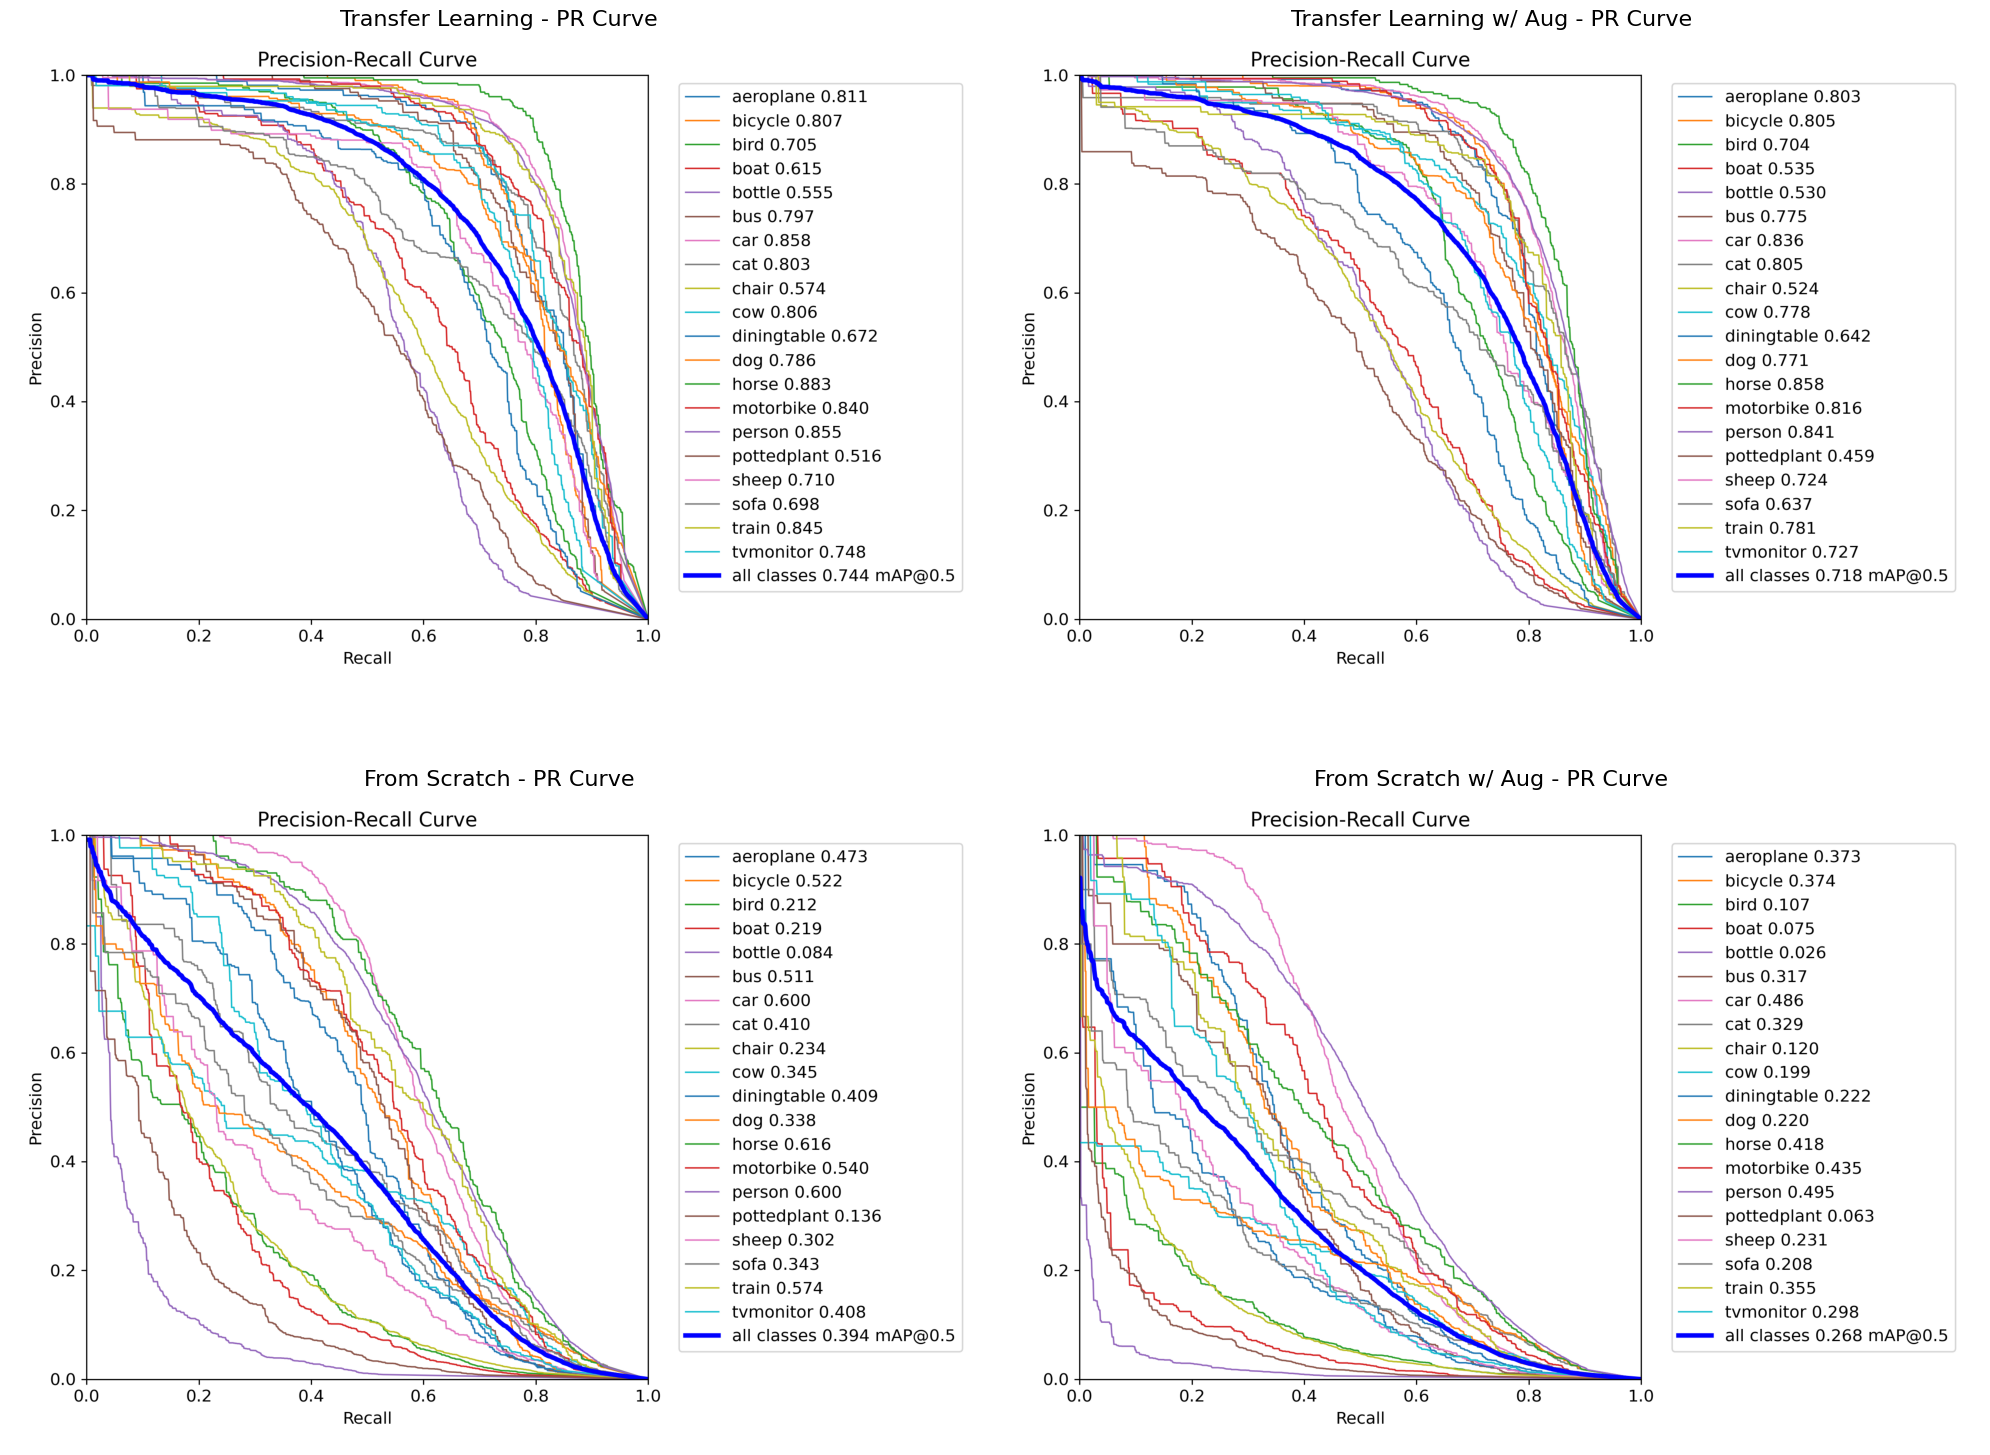

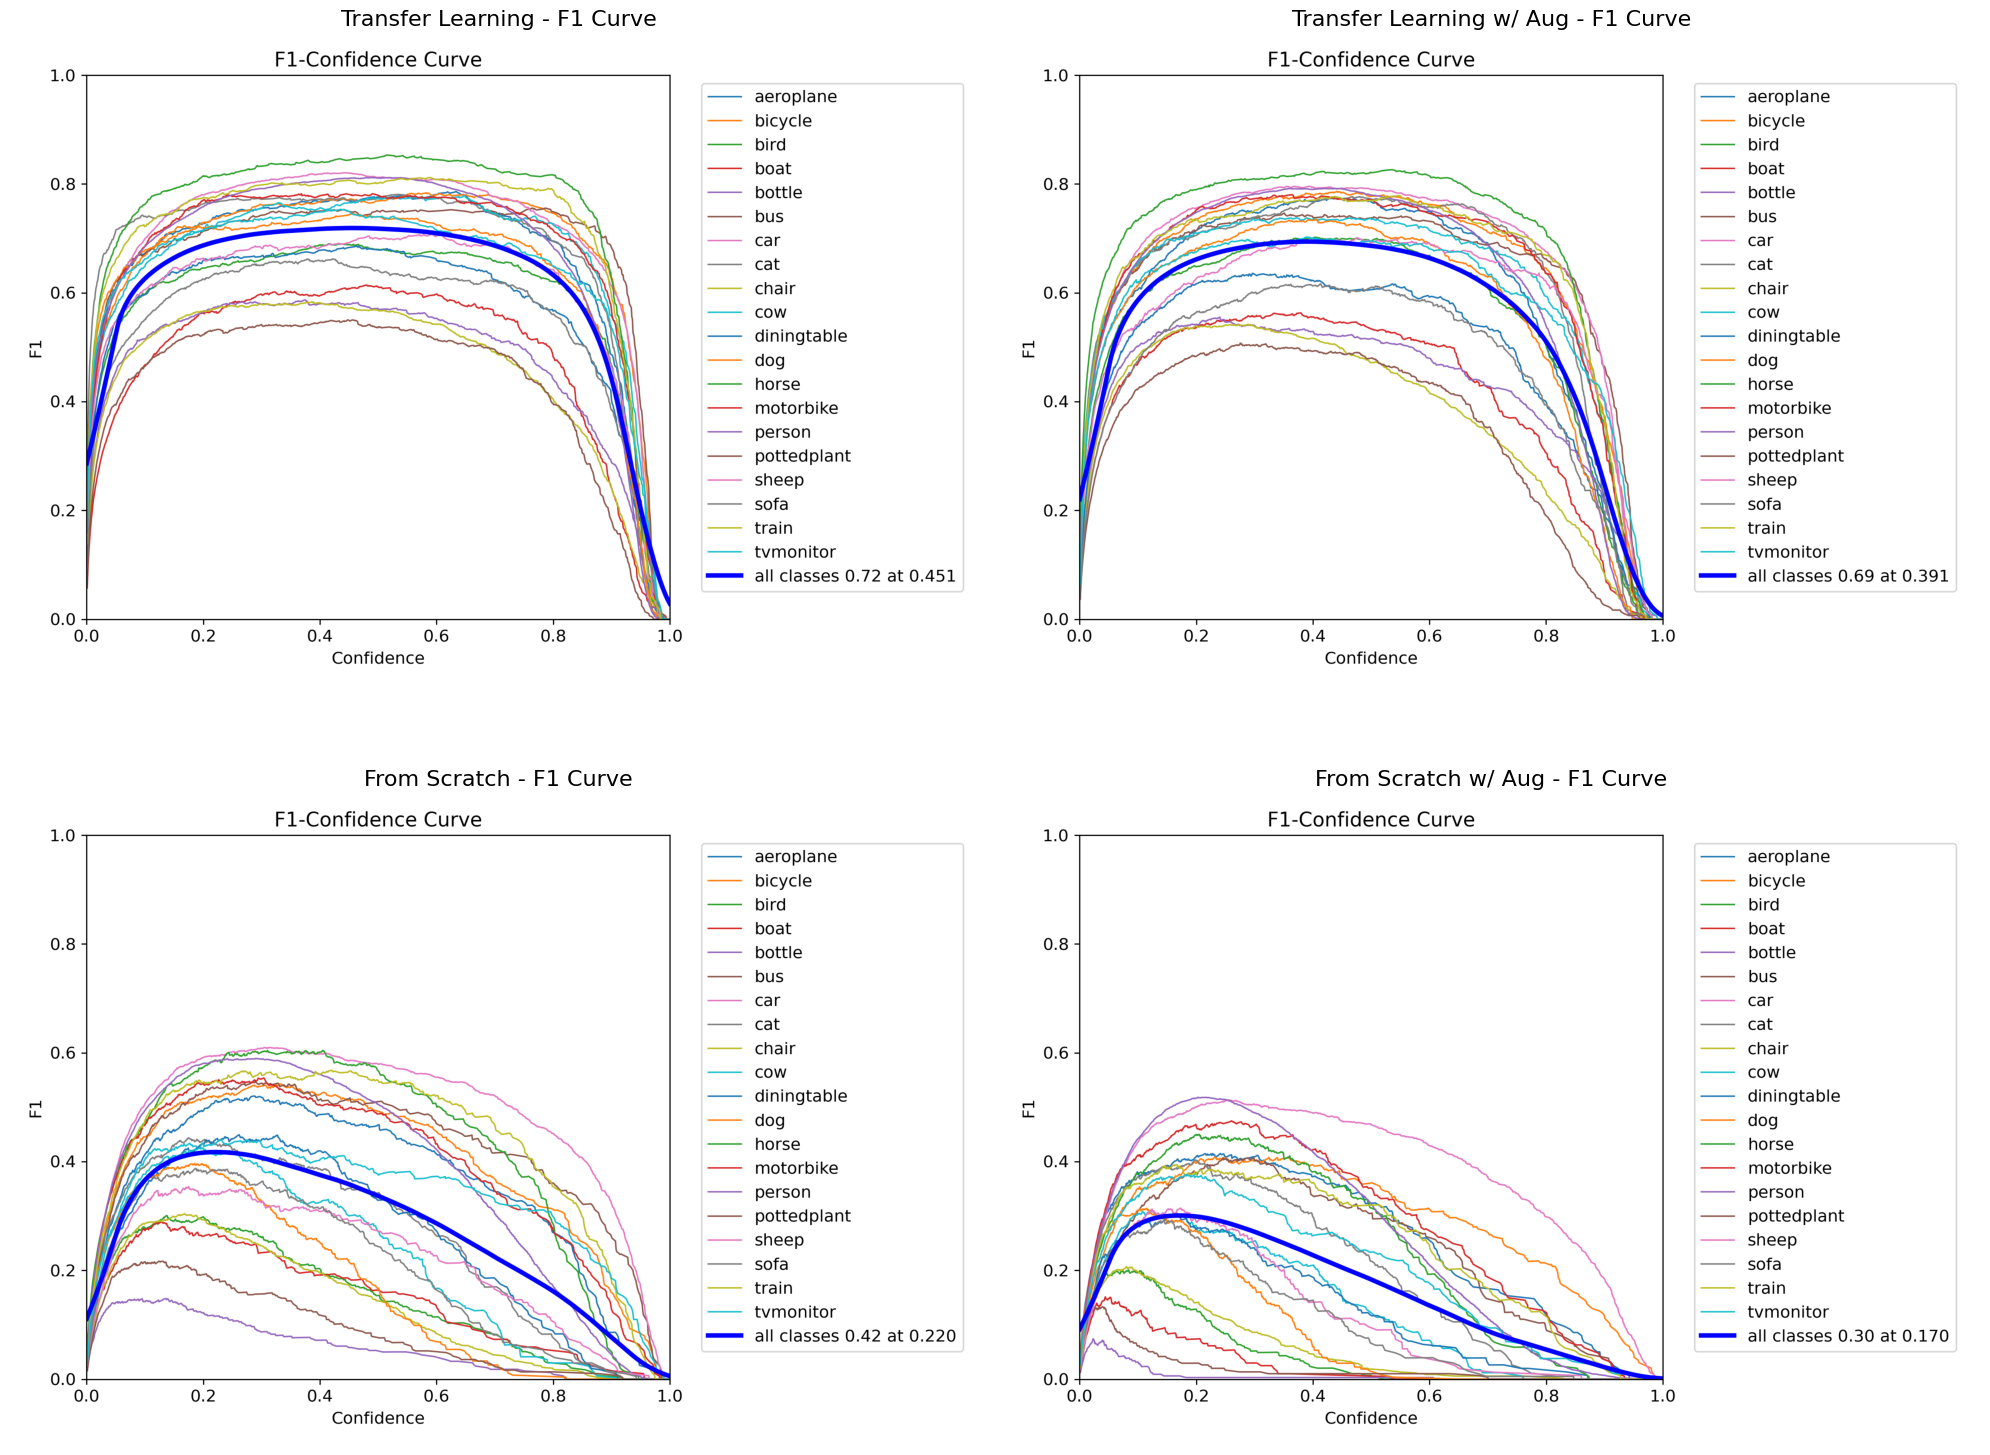

In [20]:
# Cell: Display YOLOv8 Validation Visualizations Side-by-Side
# Define function to get validation visualization paths
def get_viz_paths(exp_name, folder_name, viz_type):
    """Find visualization files in the standard locations"""
    base_path = Path(project_dir) / folder_name
    
    # Common locations where YOLOv8 visualizations might be stored
    possible_paths = [
        base_path / f"{viz_type}.png",
        base_path / "val" / f"{viz_type}.png",
        base_path / "plots" / f"{viz_type}.png"
    ]
    
    for path in possible_paths:
        if path.exists():
            return path
    
    return None

# Create side-by-side confusion matrix display
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for idx, (exp_name, folder_name) in enumerate(experiments.items()):
    conf_mat_path = get_viz_paths(exp_name, folder_name, "confusion_matrix")
    if conf_mat_path is not None:
        img = plt.imread(conf_mat_path)
        axes[idx].imshow(img)
        axes[idx].set_title(f"{exp_name} - Confusion Matrix", fontsize=16)
        axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, f"No confusion matrix found for {exp_name}", 
                     ha='center', va='center', fontsize=14)
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('confusion_matrices_comparison.png', dpi=300)
plt.show()

# Create side-by-side PR curve display
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for idx, (exp_name, folder_name) in enumerate(experiments.items()):
    pr_curve_path = get_viz_paths(exp_name, folder_name, "PR_curve")
    if pr_curve_path is not None:
        img = plt.imread(pr_curve_path)
        axes[idx].imshow(img)
        axes[idx].set_title(f"{exp_name} - PR Curve", fontsize=16)
        axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, f"No PR curve found for {exp_name}", 
                     ha='center', va='center', fontsize=14)
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('pr_curves_comparison.png', dpi=300)
plt.show()

# Create side-by-side F1 curve display
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for idx, (exp_name, folder_name) in enumerate(experiments.items()):
    f1_curve_path = get_viz_paths(exp_name, folder_name, "F1_curve")
    if f1_curve_path is not None:
        img = plt.imread(f1_curve_path)
        axes[idx].imshow(img)
        axes[idx].set_title(f"{exp_name} - F1 Curve", fontsize=16)
        axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, f"No F1 curve found for {exp_name}", 
                     ha='center', va='center', fontsize=14)
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('f1_curves_comparison.png', dpi=300)
plt.show()

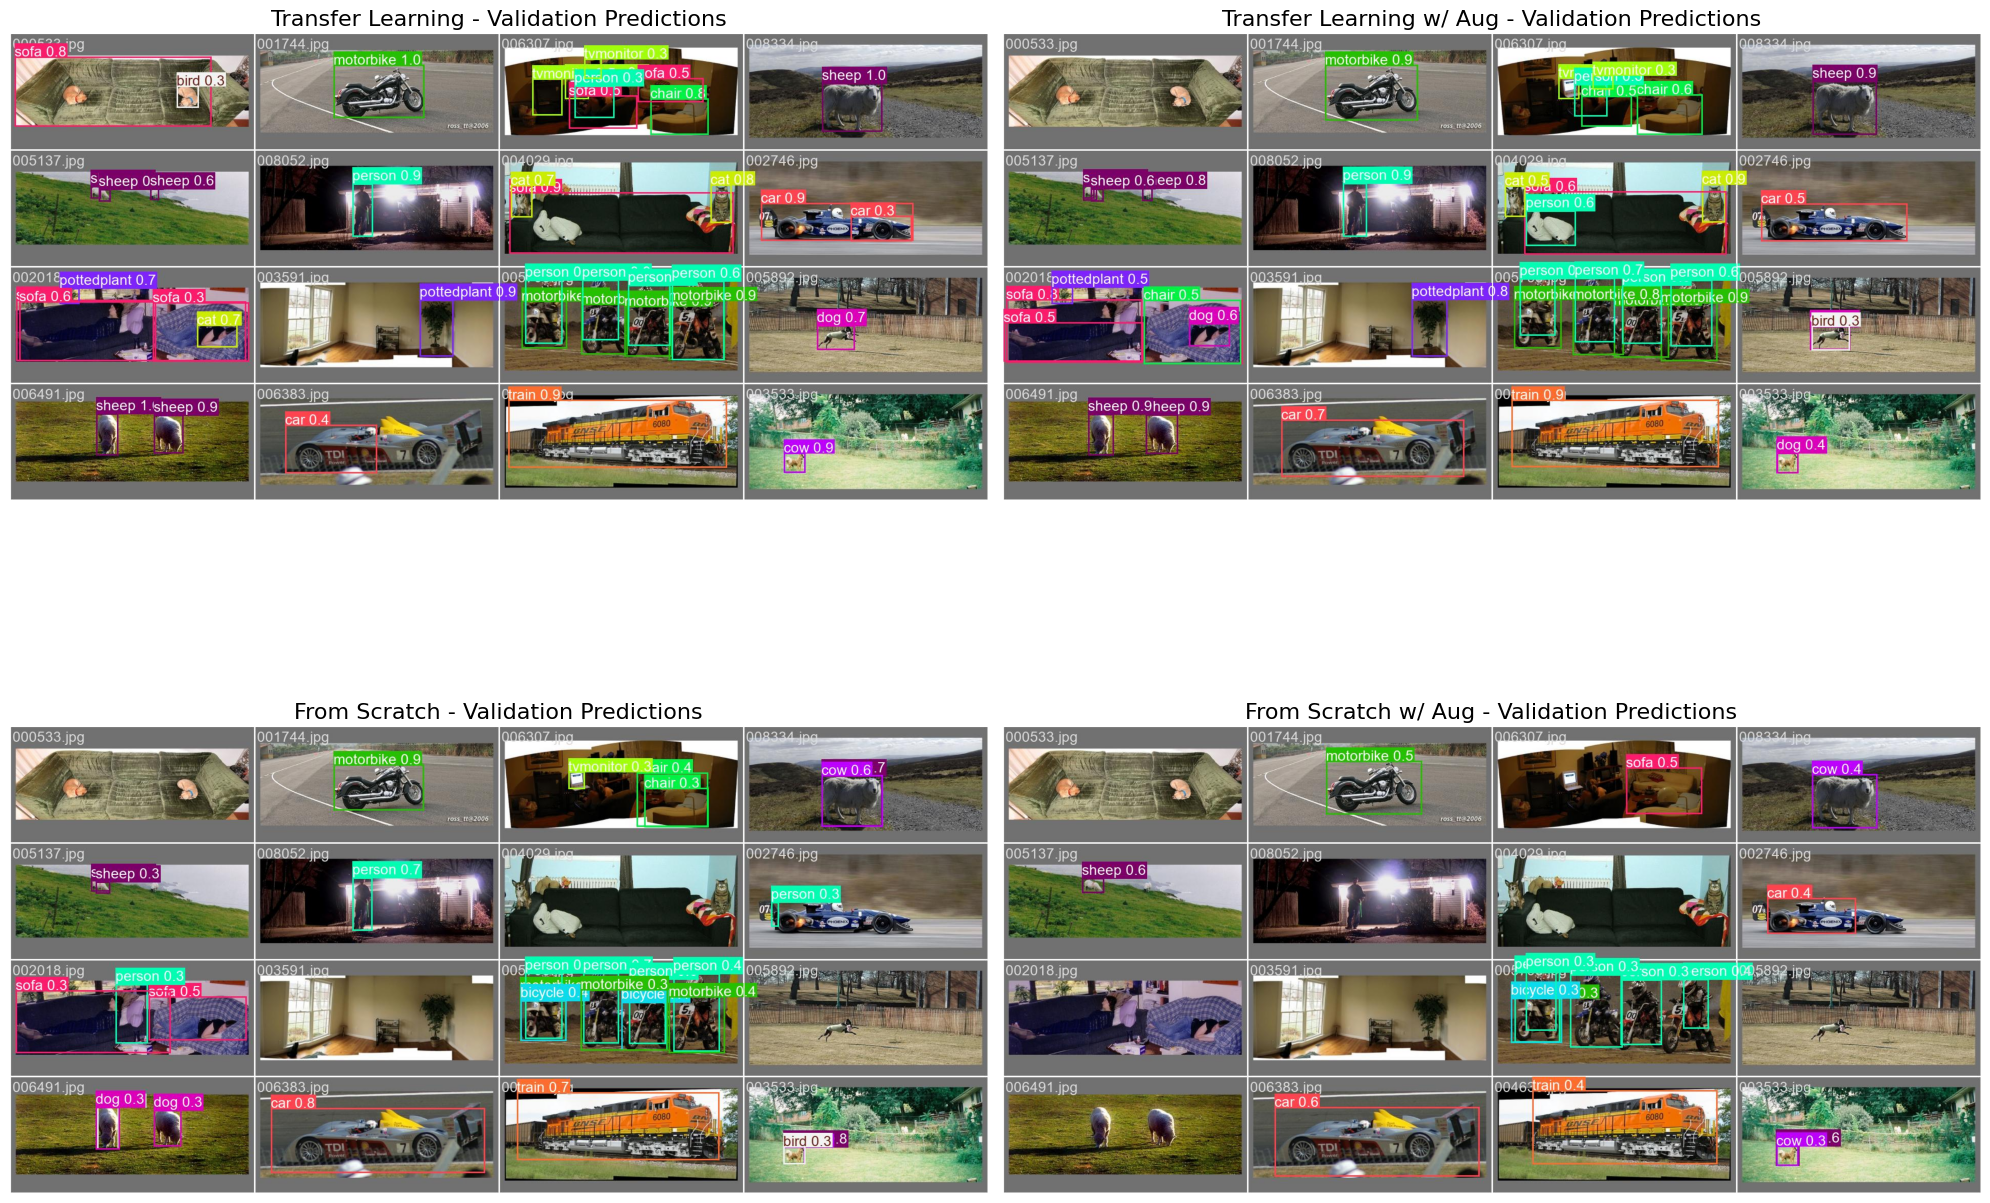

In [21]:
# Cell: Side-by-Side Prediction Examples
# Display prediction examples side-by-side
def get_prediction_image(exp_name, folder_name):
    base_path = Path(project_dir) / folder_name
    
    # Check common locations for prediction images
    possible_paths = [
        base_path / "val_batch0_pred.jpg",
        base_path / "val" / "val_batch0_pred.jpg",
        base_path / "val_batch0_labels.jpg",
        base_path / "val" / "val_batch0_labels.jpg"
    ]
    
    for img_path in possible_paths:
        if img_path.exists():
            return img_path
    
    # Return None if no image found
    return None

# Create a side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for idx, (exp_name, folder_name) in enumerate(experiments.items()):
    img_path = get_prediction_image(exp_name, folder_name)
    if img_path is not None:
        img = plt.imread(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(f"{exp_name} - Validation Predictions", fontsize=16)
        axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, f"No prediction image found for {exp_name}", 
                     ha='center', va='center', fontsize=14)
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('prediction_examples.png', dpi=300)
plt.show()